,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,7,40


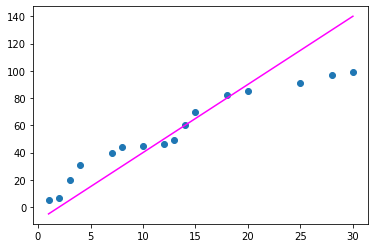

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_dict = {
    '공부시간(x)' : [1,2,3,4,7,8,10,12,13,14,15,18,20,25,28,30],
    '시험점수(t)' : [5,7,20,31,40,44,45,46,49,60,70,82,85,91,97,99]
}

df = pd.DataFrame(my_dict)

display(df.head())

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])

# 직선을 그릴꺼예요!
# plt.plot(df['공부시간(x)'],df['공부시간(x)']*2 + 3, color='r')
# plt.plot(df['공부시간(x)'],df['공부시간(x)']*5 - 7, color='g')
# plt.plot(df['공부시간(x)'],df['공부시간(x)']*1 + 8, color='b')
plt.plot(df['공부시간(x)'],df['공부시간(x)']*5 - 10, color='magenta')

plt.show()



In [11]:
# 독립변수가 1개인 단순선형회귀(Simple Linear Regression)모델에 대해서
# 알아보고 있어요!
# 이론적으로 이해한 내용을 코드로 표현해 보아요!

# 1. Training Data Set 준비 : ndarray를 이용해서 데이터셋을 사용할꺼예요!
# 2. Linear Regression Model을 정의 : 
#    - Weight와 bias를 정의하고 이를 이용해서 Hypothesis(Model)을 정의해요!
# 3. Loss function 정의 : 손실함수(Loss function)을 코드로 표현
# 4. learning rate를 정의 : 일반적으로 customizing해야 하는 값으로
#                           1e-3정도로 설정해서 사용.
# 5. 학습을 진행 : 반복적으로 편미분을 이용해서 W와 b의 값을 update처리
#

# Tensorflow를 이용해서 구현하는걸로 해요!!
# python코드로 작성하려니 너무 힘들어요!

%reset

import numpy as np

# 0. 수치미분 코드
def numerical_derivative(f,x):
    
    # f : 미분하려고 하는 다변수 함수
    # x : 모든 값을 포함하는 numpy array  ex) f'(1.0, 2.0) = (8.0, 15.0)
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)    # [0 0]
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index   # 현재의 iterator의 index를 추출 => tuple형태로 나와요
        print('현재의 idx : {}'.format(idx))        
        
        tmp = x[idx]     # 현재 index의 값을 잠시 보존.
                         # delta_x를 이용한 값으로 ndarray를 수정한 후 편미분을 계산
                         # 함수값을 계산한 후 원상복구를 해 줘야 다음 독립변수에
                         # 대한 편미분을 정상적으로 수행할 수 있어요!
        print('현재 temp : {}'.format(tmp))   
        x[idx] = tmp + delta_x        
        fx_plus_delta = f(x)    # f([1.00001, 2.0])   => f(x + delta_x)
        

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)    # f([0.99999, 2.0])   => f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
        
    return derivative_x


# 1. Training Data Set
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# 2-1. Weight & bias 정의
W = np.random.rand(1,1)
b = np.random.rand(1)

# 2-2. 학습종료 후 임의의 데이터에 대해서 예측값을 알아오는 함수
def predict(x):
    
    y = np.dot(x,W) + b   # Hypothesis
    
    return y

# 3. Loss function 정의
#    ???
def loss_func():
    pass




Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [18]:
# Tensorflow를 이용해서 배운 이론을 실제로 구현해 보아요!
# Tensorflow는 Google이 만든 Deep Library
# Tensorflow는 1.x버전과 2.x버전으로 나뉘어져요!
# 2019년 10월 Tensorflow 2.x버전이 정식으로 release
# 1.x버전은 low level의 코딩이 필요!
# 2.x버전은 상위 API(Keras)가 기본으로 포함. => 구현이 쉬워요!
# 사용하기 위해서 라이브러리부터 설치를 해야 하겠죠!!

import tensorflow as tf
print(tf.__version__)

node1 = tf.constant('Hello World')

# 그래프를 실행하려면 1.x버전에서는 session이 필요
# session은 그래프안의 특정 노드를 실행시킬 수 있어요!
sess = tf.Session()

print(sess.run(node1).decode())

# print(node1)  # Tensor("Const:0", shape=(), dtype=string)

1.15.0
Hello World


In [20]:
import tensorflow as tf

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(30, dtype=tf.float32)

node3 = node1 + node2

# session은 tensorflow 그래프를 실행시키기 위해서 필요!
# 1.x버전에서만 사용되요. 2.x버전에서는 삭제
sess = tf.Session()

print(sess.run([node3, node1]))

[40.0, 10.0]
